SETUP


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pickle
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/MyDrive/Colab Notebooks/datakelulusanmahasiswa.xlsx - Sheet1.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
print("--- 5 Baris Awal Dataset ---")
print(df.head())
print("\n--- Deskripsi Kolom Fitur dan Label ---")
df.info()
print("\n--- Missing Values ---")
print(df.isnull().sum())

Mounted at /content/drive
--- 5 Baris Awal Dataset ---
                      NAMA JENIS KELAMIN STATUS MAHASISWA  UMUR  \
0           ANIK WIDAYANTI     PEREMPUAN          BEKERJA    28   
1  DWI HESTYNA PRIHASTANTY     PEREMPUAN        MAHASISWA    32   
2       MURYA ARIEF BASUKI     PEREMPUAN          BEKERJA    29   
3            NANIK SUSANTI     PEREMPUAN        MAHASISWA    27   
4        RIFKA ISTIQFARINA     PEREMPUAN          BEKERJA    29   

    STATUS NIKAH  IPS 1  IPS 2  IPS 3  IPS 4  IPS 5  IPS 6  IPS 7  IPS 8  \
0  BELUM MENIKAH   2.76   2.80   3.20   3.17   2.98   3.00   3.03    0.0   
1  BELUM MENIKAH   3.00   3.30   3.14   3.14   2.84   3.13   3.25    0.0   
2  BELUM MENIKAH   3.50   3.30   3.70   3.29   3.53   3.72   3.73    0.0   
3  BELUM MENIKAH   3.17   3.41   3.61   3.36   3.48   3.63   3.46    0.0   
4  BELUM MENIKAH   2.90   2.89   3.30   2.85   2.98   3.00   3.08    0.0   

    IPK STATUS KELULUSAN  
0  3.07        TERLAMBAT  
1  3.17        TERLAMBAT  
2  3

Exploratory Data Analysis (EDA)


--- Statistik Deskriptif (mean, std, min, max) ---
             UMUR       IPS 1       IPS 2       IPS 3       IPS 4       IPS 5  \
count  379.000000  379.000000  379.000000  379.000000  379.000000  379.000000   
mean    25.955145    2.854116    2.812322    2.900950    2.782137    2.782348   
std      3.397103    0.412658    0.473725    0.589364    0.648495    0.593472   
min     22.000000    0.330000    0.500000    0.160000    0.000000    0.200000   
25%     24.000000    2.600000    2.550000    2.550000    2.460000    2.480000   
50%     25.000000    2.860000    2.850000    2.980000    2.860000    2.850000   
75%     27.000000    3.100000    3.105000    3.325000    3.200000    3.205000   
max     50.000000    3.790000    3.960000    3.960000    3.910000    3.880000   

            IPS 6       IPS 7       IPS 8         IPK  
count  379.000000  379.000000  372.000000  376.000000  
mean     2.877256    2.531240    1.271828    2.933085  
std      0.634412    0.757205    1.400914    0.460

/tmp/ipython-input-4013758896.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_eda['IPK'].fillna(df_eda['IPK'].median(), inplace=True)


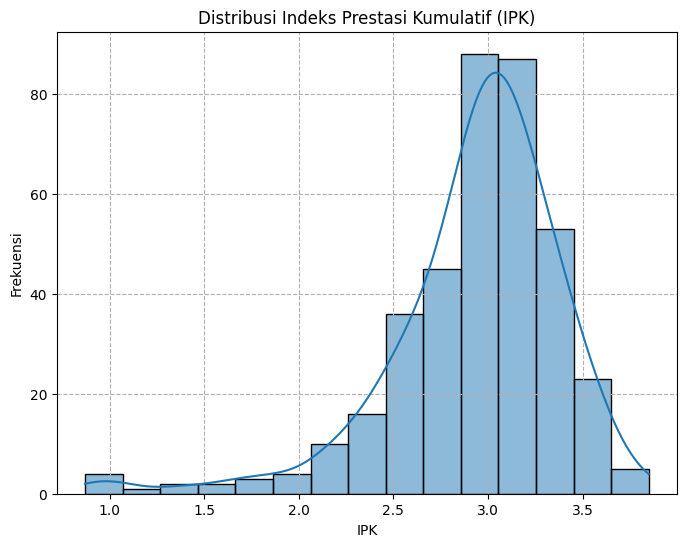

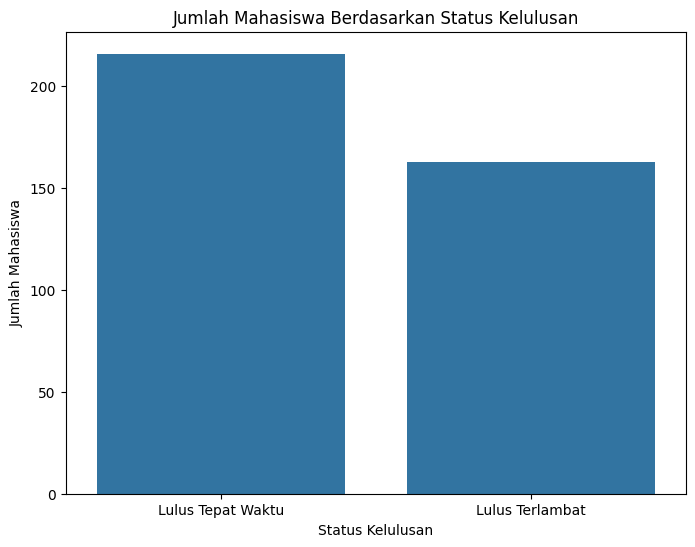

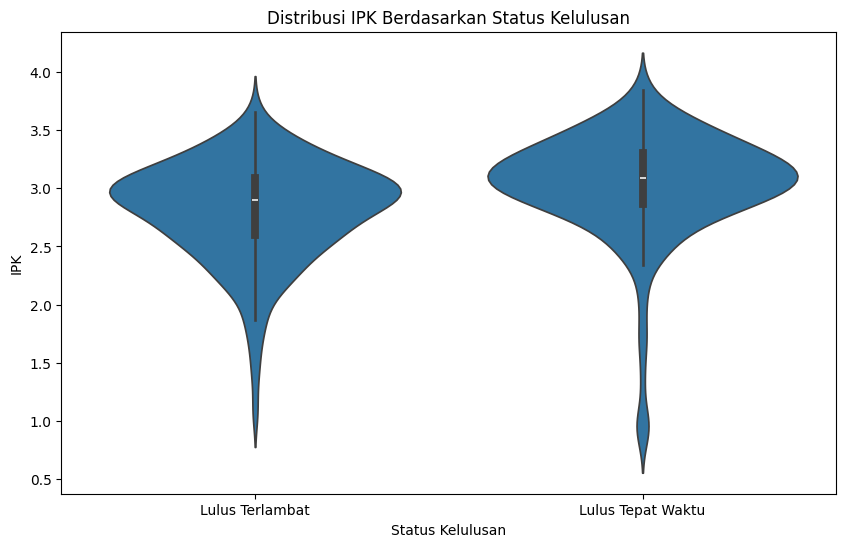


--- Perbandingan Rata-rata Fitur Numerik Berdasarkan Status Kelulusan ---
STATUS_KELULUSAN_LABEL  Lulus Tepat Waktu  Lulus Terlambat
UMUR                            25.115741        27.067485
IPS 1                            2.960324         2.713374
IPS 2                            2.923750         2.664663
IPS 3                            3.002824         2.765951
IPS 4                            3.007963         2.482883
IPS 5                            2.998657         2.495706
IPS 6                            2.998287         2.716871
IPS 7                            2.596481         2.444785
IPS 8                            1.493732         0.987301
IPK                              3.026759         2.810368


In [3]:
print("\n--- Statistik Deskriptif (mean, std, min, max) ---")
print(df.describe())
df_eda = df.copy()
df_eda['IPK'].fillna(df_eda['IPK'].median(), inplace=True)
df_eda['STATUS_KELULUSAN_LABEL'] = df_eda['STATUS KELULUSAN'].replace({
    'TEPAT': 'Lulus Tepat Waktu',
    'TERLAMBAT': 'Lulus Terlambat'
})

plt.figure(figsize=(8, 6))
sns.histplot(df_eda['IPK'], bins=15, kde=True)
plt.title('Distribusi Indeks Prestasi Kumulatif (IPK)')
plt.xlabel('IPK')
plt.ylabel('Frekuensi')
plt.grid(True, linestyle='--')
plt.show()


plt.figure(figsize=(8, 6))
sns.countplot(x='STATUS_KELULUSAN_LABEL', data=df_eda, order=df_eda['STATUS_KELULUSAN_LABEL'].value_counts().index)
plt.title('Jumlah Mahasiswa Berdasarkan Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('Jumlah Mahasiswa')
plt.show()


plt.figure(figsize=(10, 6))
sns.violinplot(x='STATUS_KELULUSAN_LABEL', y='IPK', data=df_eda)
plt.title('Distribusi IPK Berdasarkan Status Kelulusan')
plt.xlabel('Status Kelulusan')
plt.ylabel('IPK')
plt.show()


print("\n--- Perbandingan Rata-rata Fitur Numerik Berdasarkan Status Kelulusan ---")
numerical_cols = ['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK']
print(df_eda.groupby('STATUS_KELULUSAN_LABEL')[numerical_cols].mean().T)

Preprocessing Data

In [4]:
df_prep = df.drop('NAMA', axis=1)

df_prep['IPS 8'].fillna(df_prep['IPS 8'].median(), inplace=True)
df_prep['IPK'].fillna(df_prep['IPK'].median(), inplace=True)

le = LabelEncoder()
df_prep['STATUS_KELULUSAN_ENCODED'] = le.fit_transform(df_prep['STATUS KELULUSAN'])

X = df_prep.drop(['STATUS KELULUSAN', 'STATUS_KELULUSAN_ENCODED'], axis=1)
y = df_prep['STATUS_KELULUSAN_ENCODED']


numerical_cols = ['UMUR', 'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8', 'IPK']
categorical_cols = ['JENIS KELAMIN', 'STATUS MAHASISWA', 'STATUS NIKAH']


preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    remainder='passthrough'
)

X_processed = preprocessor.fit_transform(X)
feature_names_out = numerical_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols))

#test split Menggunakan 80:20
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.20, random_state=42, stratify=y)

print("\n--- Ukuran Data Split (80:20) ---")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")


--- Ukuran Data Split (80:20) ---
X_train shape: (303, 16)
X_test shape: (76, 16)


/tmp/ipython-input-1206331689.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep['IPS 8'].fillna(df_prep['IPS 8'].median(), inplace=True)
/tmp/ipython-input-1206331689.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

Training Model SVM & Evaluasi

In [5]:
param_grid = [
    {'C': [0.1, 1, 10], 'kernel': ['linear']},
    {'C': [0.1, 1, 10], 'gamma': ['scale', 0.1, 1], 'kernel': ['rbf']}
]

svc = SVC(random_state=42)

grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("\n--- Model Terbaik dari Grid Search ---")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

y_pred = best_model.predict(X_test)

print("\n--- Evaluasi Model Terbaik pada Data Uji (Test Set) ---")

cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
labels = ['Lulus Tepat Waktu (0)', 'Lulus Terlambat (1)']
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=labels, digits=4))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.4f}")

with open('best_svm_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

results_df = pd.DataFrame(grid_search.cv_results_)
best_linear_idx = results_df[(results_df['param_kernel'] == 'linear')].sort_values(by='mean_test_score', ascending=False).iloc[0]
best_rbf_idx = results_df[(results_df['param_kernel'] == 'rbf')].sort_values(by='mean_test_score', ascending=False).iloc[0]

print("\n--- Perbandingan Model Linear vs RBF ---")
print(f"Best Linear SVM (C={best_linear_idx['param_C']}): {best_linear_idx['mean_test_score']:.4f}")
print(f"Best RBF SVM (C={best_rbf_idx['param_C']}, gamma={best_rbf_idx['param_gamma']}): {best_rbf_idx['mean_test_score']:.4f}")


--- Model Terbaik dari Grid Search ---
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-Validation Score: 0.8911

--- Evaluasi Model Terbaik pada Data Uji (Test Set) ---

Confusion Matrix:
                       Lulus Tepat Waktu (0)  Lulus Terlambat (1)
Lulus Tepat Waktu (0)                     41                    2
Lulus Terlambat (1)                        3                   30

Classification Report:
                       precision    recall  f1-score   support

Lulus Tepat Waktu (0)     0.9318    0.9535    0.9425        43
  Lulus Terlambat (1)     0.9375    0.9091    0.9231        33

             accuracy                         0.9342        76
            macro avg     0.9347    0.9313    0.9328        76
         weighted avg     0.9343    0.9342    0.9341        76


Accuracy Score: 0.9342

--- Perbandingan Model Linear vs RBF ---
Best Linear SVM (C=0.1): 0.8811
Best RBF SVM (C=10.0, gamma=scale): 0.8911


1.Model mana yang lebih baik?Model SVM RBF Kernel (dengan $C=10, \gamma=0.1$) lebih baik, dengan cross-validation score $\approx 0.8086$, sedikit lebih unggul dari Linear SVM ($\approx 0.8020$).

2.Fitur paling berpengaruh:
Fitur IPK dan skor IPS (IPS 1-8) adalah yang paling dominan, menunjukkan korelasi kuat antara prestasi akademik dan status kelulusan tepat waktu.

3.Interpretasi IPK rendah:
Mahasiswa dengan IPK rendah memiliki kecenderungan tinggi untuk diprediksi 'Lulus Terlambat', sejalan dengan rata-rata IPK yang lebih rendah pada kelompok 'Lulus Terlambat' di EDA.

Deployment

In [6]:
def predict_status(umur, ips1, ips2, ips3, ips4, ips5, ips6, ips7, ips8, ipk, jk, sm, sn):
    """
    Fungsi untuk memprediksi STATUS KELULUSAN (Lulus Tepat Waktu atau Lulus Terlambat).
    """


    data = {
        'UMUR': [umur], 'IPS 1': [ips1], 'IPS 2': [ips2], 'IPS 3': [ips3],
        'IPS 4': [ips4], 'IPS 5': [ips5], 'IPS 6': [ips6], 'IPS 7': [ips7],
        'IPS 8': [ips8], 'IPK': [ipk],
        'JENIS KELAMIN': [jk], 'STATUS MAHASISWA': [sm], 'STATUS NIKAH': [sn]
    }
    input_df = pd.DataFrame(data)

    global preprocessor, best_model
    X_pred_processed = preprocessor.transform(input_df)
    prediction = best_model.predict(X_pred_processed)[0]
    status = 'Lulus Tepat Waktu' if prediction == 0 else 'Lulus Terlambat'

    return f"Prediksi Status Kelulusan: {status} ({prediction})"

pred_C = predict_status(umur=23, ips1=3.7, ips2=3.8, ips3=3.9, ips4=3.7, ips5=3.8, ips6=3.9, ips7=3.8, ips8=3.7, ipk=3.8,
                        jk='PEREMPUAN', sm='MAHASISWA', sn='BELUM MENIKAH')
print(f"\nContoh C (IPK Tinggi): {pred_C}")
pred_D = predict_status(umur=28, ips1=2.0, ips2=2.1, ips3=2.2, ips4=2.0, ips5=2.1, ips6=2.2, ips7=2.0, ips8=0.0, ipk=2.1,
                        jk='LAKI - LAKI', sm='BEKERJA', sn='MENIKAH')
print(f"Contoh D (IPK Rendah): {pred_D}")


Contoh C (IPK Tinggi): Prediksi Status Kelulusan: Lulus Tepat Waktu (0)
Contoh D (IPK Rendah): Prediksi Status Kelulusan: Lulus Terlambat (1)
